Importing libraries

In [12]:
import cv2 as cv
import numpy as np
import random
import matplotlib.pyplot as plt
import math

1- Reading 10 seconds video

In [13]:
vid = cv.VideoCapture('All over in 10 seconds.mp4')

In [14]:
#Check if the video file is already opened
if (vid.isOpened()== False):
    print("Error opening video file")

2- Sampling the video into frames

In [15]:
lst = []
while(vid.isOpened()):
# Capture frame-by-frame
    _, frame = vid.read()
    if _ == False:
        break
    #Convert BGR to RGB
    img=np.zeros(frame.shape,np.uint8)
    img[:,:,0]=frame[:,:,2]
    img[:,:,1]=frame[:,:,1]
    img[:,:,2]=frame[:,:,0]
    lst.append(img)

3- Read random image

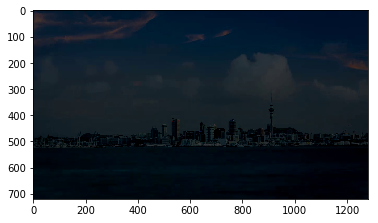

In [16]:
random_frame = random.choice(lst)
plt.imshow(random_frame)

4- RGB to YCbCr

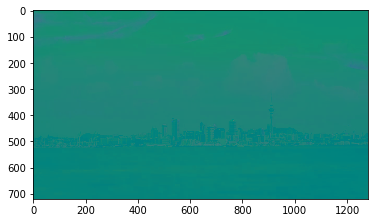

In [17]:
def RGB2YCbCr(image):
    weights_matrix = np.array([[.299, .587, .114], [-.1687, -.3313, .5], [.5, -.4187, -.0813]])
    YCbCr = image.dot(weights_matrix.T)
    YCbCr[:,:,[1,2]] += 128
    return np.uint8(YCbCr)
new_color_space = RGB2YCbCr(random_frame)
plt.imshow(new_color_space)

5- Writing the image in the new color space

In [18]:
cv.imwrite('new_color_space.png', new_color_space)

True

6- Applying 4:2:0

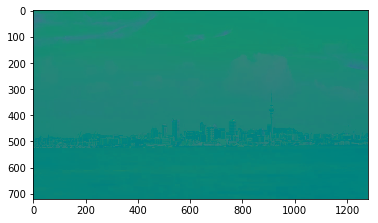

In [19]:
img1 = new_color_space
img2 = img1.copy() # 4:2:0
img2[1::2, :] = img2[::2, :] 
# Vertically, every second element equals to element above itself.
img2[:, 1::2] = img2[:, ::2] 
plt.imshow(img2)

7- Applying 8*8 blocks

In [20]:
def blocks8(img):
    lst = []
    lst_block = []
    img1 = img.copy()
    y = img1.flatten()
    if len(y) % 64 == 0:
        pass
    else:
        while len(y) % 64 != 0:
            y.append(0)
    for i in range(0,len(y),8):
        lst.append([y[i:i+8]])
    for i in range(0,len(lst),8):
        lst_block.append(np.vstack(lst[i:i+8]))
    return lst_block

blocks = blocks8(new_color_space)
blocks

[array([[ 28, 139, 121,  28, 139, 121,  28, 138],
        [121,  28, 138, 121,  28, 138, 122,  28],
        [138, 122,  28, 138, 122,  26, 138, 122],
        [ 28, 138, 122,  28, 138, 122,  28, 138],
        [122,  28, 138, 122,  25, 138, 121,  24],
        [138, 121,  24, 138, 121,  25, 138, 121],
        [ 24, 143, 119,  23, 143, 119,  23, 143],
        [117,  23, 143, 117,  23, 143, 113,  23]], dtype=uint8),
 array([[143, 113,  23, 144, 113,  23, 144, 113],
        [ 25, 140, 116,  25, 140, 116,  23, 140],
        [116,  23, 140, 116,  24, 140, 117,  24],
        [140, 117,  24, 140, 117,  23, 140, 117],
        [ 22, 141, 115,  22, 141, 115,  22, 141],
        [115,  22, 141, 115,  23, 141, 115,  23],
        [141, 115,  24, 140, 116,  25, 140, 116],
        [ 24, 140, 116,  24, 140, 116,  24, 140]], dtype=uint8),
 array([[116,  24, 140, 116,  24, 140, 116,  23],
        [140, 116,  23, 140, 116,  23, 140, 116],
        [ 23, 140, 116,  22, 140, 116,  22, 140],
        [116,  22, 1

8- 2:1:1 writing

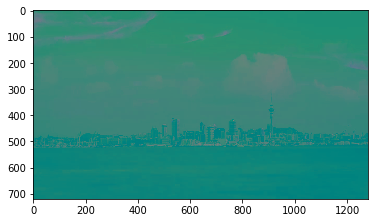

In [22]:
from PIL import Image
def Quantize(arr):
    img = Image.fromarray(arr)
    i, j = img.size
    for row in range(j):
        for col in range(i):
            y, cb, cr = img.getpixel((col, row))
            y = 2*y 
            cb = cb
            cr = cr
            img.putpixel((col, row), (y, cb, cr))
    return img

plt.imshow(Quantize(new_color_space))

9- DCT 

In [23]:
def DCT(img):
    pi = math.pi
    row = 8
    col = 8
    lst = []
    for i in range(row):
        lst.append([None for _ in range(col)])
    for i in range(row):
        for j in range(col):
            # number of row and columns of specified matrix
            if (i == 0):
                ci = 1 / (row ** 0.5)
            else:
                ci = (2 / row) ** 0.5
            if (j == 0):
                cj = 1 / (col ** 0.5)
            else:
                cj = (2 / col) ** 0.5
                
            sum = 0
            for k in range(row):
                for l in range(len(lst)):
                    lst1 = img[k][l] * math.cos((2 * k + 1) * i * pi / (2 * row)) * math.cos((2 * l + 1) * j * pi / (2 * col))
                    sum = sum + lst1

            lst[i][j] = ci * cj * sum
    arr = np.array(lst)
    return arr

D = []
#taking only 43 groups as the device abilities allow
for b in range(len(blocks)//1000):
    D.append(DCT(blocks[b]))
# D = DCT(blocks[0])
D

[array([[ 7.53125000e+02,  1.86052097e-01, -1.45050170e+01,
         -1.97207866e+00, -2.63750000e+01, -1.09303681e+01,
          3.45562691e+01,  5.39300152e-01],
        [ 6.63779447e+00, -6.51801832e+00,  3.07031713e+00,
         -7.78971232e+00,  4.53443839e+00, -3.69842314e+01,
         -8.46886491e+00,  4.84660255e+00],
        [-1.60753789e+01, -2.33403336e+00, -2.41589331e+01,
         -2.94669264e+00, -4.29110132e+01, -1.56511769e+01,
          5.85748241e+01,  1.52585025e+00],
        [ 2.58358978e+00, -8.47719879e+00,  4.46952028e+00,
         -1.02116679e+01,  7.05683575e+00, -5.65416375e+01,
         -1.15690550e+01,  5.11597060e+00],
        [-2.71250000e+01, -7.93758136e-01, -4.43268452e+01,
         -2.98738248e+00, -8.06250000e+01, -1.65654422e+01,
          1.05628652e+02,  4.68100928e-01],
        [ 9.98594073e+00, -4.33248630e+01,  1.31667714e+01,
         -5.80719676e+01,  2.41638529e+01, -2.91836213e+02,
         -3.09664294e+01,  2.92745869e+01],
        [ 3.1418

10- Inverse DCT

In [24]:
def IDCT(img):
    arr = np.transpose(img)
    return arr

I = []
for b in range(len(D)):
    I.append(IDCT(D[b]))
I

[array([[ 7.53125000e+02,  6.63779447e+00, -1.60753789e+01,
          2.58358978e+00, -2.71250000e+01,  9.98594073e+00,
          3.14183616e+01, -3.28992730e-01],
        [ 1.86052097e-01, -6.51801832e+00, -2.33403336e+00,
         -8.47719879e+00, -7.93758136e-01, -4.33248630e+01,
          4.73487878e+00,  5.31627246e+00],
        [-1.45050170e+01,  3.07031713e+00, -2.41589331e+01,
          4.46952028e+00, -4.43268452e+01,  1.31667714e+01,
          5.33248241e+01, -7.89221445e-01],
        [-1.97207866e+00, -7.78971232e+00, -2.94669264e+00,
         -1.02116679e+01, -2.98738248e+00, -5.80719676e+01,
          5.88318993e+00,  4.73244572e+00],
        [-2.63750000e+01,  4.53443839e+00, -4.29110132e+01,
          7.05683575e+00, -8.06250000e+01,  2.41638529e+01,
          9.99008318e+01, -2.07621030e+00],
        [-1.09303681e+01, -3.69842314e+01, -1.56511769e+01,
         -5.65416375e+01, -1.65654422e+01, -2.91836213e+02,
          3.15978582e+01,  2.54191801e+01],
        [ 3.4556